# <span style="color:green">Geolocalisation  -  Notebook 2.1 Modelling genomic data - SUBSPECIES</span>

## <span style="color:green">0. Load libraries and data stored as pkl or csv</span>

In [101]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, accuracy_score, average_precision_score, f1_score

# If should be df_c2_filtPos80filtSamp70 but for abbreviation we will made it df_train_c
df = pd.read_pickle("./pkl/df_c2_filtPos80filtSamp70.pkl.gz", compression="infer") # Import object with pickle

geo = pd.read_csv("../../../Documents/Postgrau_DSML/Geolocalisation/data/Sample_localisation_extended.csv") # Data with geolocalisation

## <span style="color:green">1. Formatting the data</span>
### <span style="color:green">1.1 Obtain distribution of mean values</span>

<span style="color:green">Obtain information about the mean value of the dataset, taking into account that non NaN values can be: 0, 1 or 2.</span>

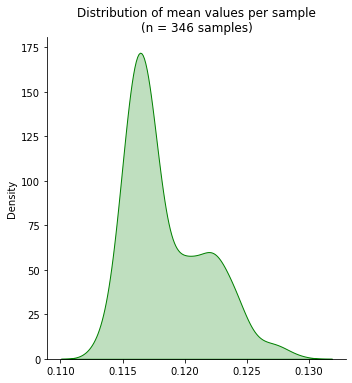

In [122]:
sns.displot(df.mean(axis=1), color="green", kind="kde", fill = True).set(title = "Distribution of mean values per sample\n(n = 346 samples)")


<span style="color:green">The mean value is ~0.12. Replace all NaN by this number.</span>

### <span style="color:green">1.2 Replace NaN by mean of columns and rows</span>

In [103]:
mean_val=df.iloc[:,].mean().mean()
df = df.replace(np.nan, mean_val)
#df.to_csv('./pkl/df_c2_filtPos80filtSamp70_meanval.csv.gz', index = True, compression='infer')

## <span style="color:green">2. Modelling </span>

<span style="color:green">We the dataset clean, we can start testing different models.</span>

#### <span style="color:green">Define X and y variables</span>

In [210]:
# Set seed
import random
random.seed(1)

names = df.axes[0].tolist() # Names of samples
geo = geo.reset_index().set_index('ExtractID').loc[names].reset_index().set_index('index') # Extract geo rows that are in names

y = geo.iloc[:,5:6] # For subspecies
X = df.reset_index(drop = True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# To make sure that dimensions are ok
print(X_train.shape)
print(X_test.shape)
print(len(y_train))
print(len(y_test))

(276, 288274)
(70, 288274)
276
70


### <span style="color:green">2.1 Random forest</span>

In [211]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

# Train + predict
rf_clf = RandomForestClassifier(random_state = 1)
rf_y_pred = rf_clf.fit(X_train, y_train.values.ravel()).predict(X_test)

print("The rf_clf model has an accuracy of", rf_clf.score(X_train,y_train), "in the data it has been trained.")

print("Balanced accuracy:", balanced_accuracy_score(y_test, rf_y_pred)) 
print("F1-score (micro) on the prediction:", f1_score(y_test, rf_y_pred, average = 'micro')) 

The rf_clf model has an accuracy of 1.0 in the data it has been trained.
Balanced accuracy: 1.0
F1-score (micro) on the prediction: 1.0


<span style="color:green">The Random Forest classifier shows an accuracy of 1 for the classification at the subspecies level.</span>

Text(0.5, 1.0, 'Confusion matrix Random Forest Classifier \n(default params)')

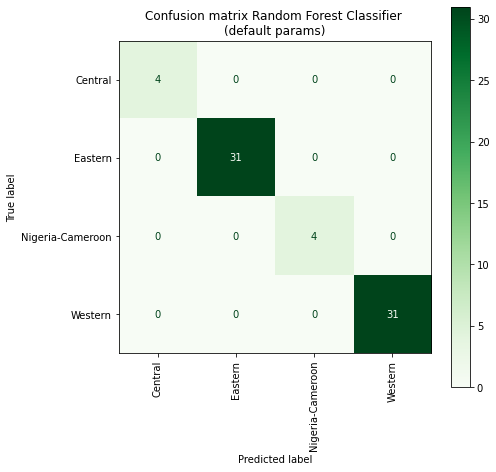

In [214]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, rf_y_pred, labels=rf_clf.classes_)
cmp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_clf.classes_)

fig,ax = plt.subplots(figsize=(7,7))

cmp.plot(xticks_rotation = 'vertical', colorbar=True, cmap = "Greens", ax=ax)
cmp.ax_.set_title("Confusion matrix Random Forest Classifier \n(default params)")

### <span style="color:green">2.2 Nearest Neighbor</span>

In [261]:
from sklearn.neighbors import KNeighborsClassifier

# Train + predict
nn_clf = KNeighborsClassifier()
nn_y_pred = nn_clf.fit(X_train, y_train.values.ravel()).predict(X_test)

print("The nn_clf model has an accuracy of", nn_clf.score(X_train,y_train), "in the data it has been trained.")
print("Balanced accuracy:", balanced_accuracy_score(y_test, nn_y_pred)) 
print("F1-score (micro) on the prediction:", f1_score(y_test, nn_y_pred, average = 'micro')) 

The nn_clf model has an accuracy of 1.0 in the data it has been trained.
Balanced accuracy: 1.0
F1-score (micro) on the prediction: 1.0


<span style="color:green">Nearest Neighbors also show high performance.</span>

Text(0.5, 1.0, 'Confusion matrix Nearest Neighbors\n(default params)')

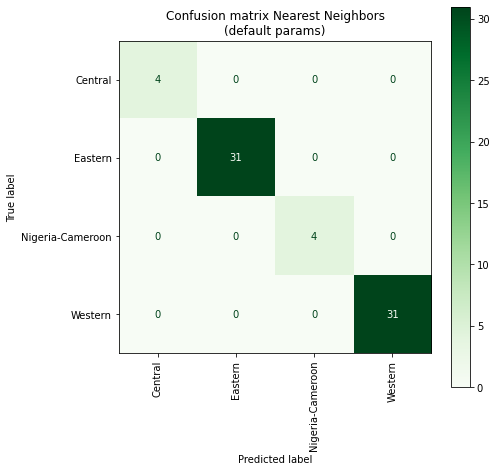

In [218]:
cm = confusion_matrix(y_test, rf_y_pred, labels=nn_clf.classes_)
cmp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nn_clf.classes_)

fig,ax = plt.subplots(figsize=(7,7))

cmp.plot(xticks_rotation = 'vertical', colorbar=True, cmap = "Greens", ax=ax)
cmp.ax_.set_title("Confusion matrix Nearest Neighbors\n(default params)")

### <span style="color:green">2.3 Support Vector Machine</span>

In [219]:
from sklearn.svm import LinearSVC

# Train + predict
svm_clf = LinearSVC(random_state=1)
svm_y_pred = svm_clf.fit(X_train, y_train.values.ravel()).predict(X_test)

print("The svm_clf model has an accuracy of", svm_clf.score(X_train,y_train), "in the data it has been trained.")

print("Balanced accuracy:", balanced_accuracy_score(y_test, svm_y_pred)) 
print("F1-score (micro) on the prediction:", f1_score(y_test, svm_y_pred, average = 'micro')) 

The svm_clf model has an accuracy of 1.0 in the data it has been trained.
Balanced accuracy: 1.0
F1-score (micro) on the prediction: 1.0


<span style="color:green">Support vector machine also shows an accuracy and F1-score of 1.</span>

Text(0.5, 1.0, 'Confusion matrix Support Vector Machine\n(default params)')

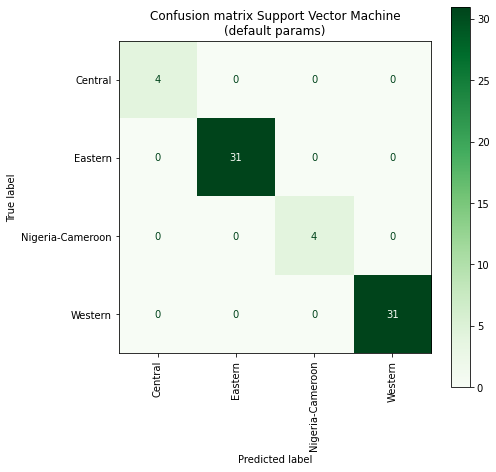

In [220]:
cm = confusion_matrix(y_test, rf_y_pred, labels=svm_clf.classes_)
cmp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_clf.classes_)

fig,ax = plt.subplots(figsize=(7,7))

cmp.plot(xticks_rotation = 'vertical', colorbar=True, cmap = "Greens", ax=ax)
cmp.ax_.set_title("Confusion matrix Support Vector Machine\n(default params)")

### <span style="color:green">2.4 Categorical Naive Bayes</span>

In [260]:
from sklearn.naive_bayes import CategoricalNB

# Train + predict
cnb_clf = CategoricalNB(min_categories=4)
cnb_y_pred = cnb_clf.fit(X_train, y_train.values.ravel()).predict(X_test)

print("The cnb_clf model has an accuracy of", cnb_clf.score(X_train,y_train), "in the data it has been trained.")

print("Balanced accuracy:", balanced_accuracy_score(y_test, cnb_y_pred)) 
print("F1-score (micro) on the prediction:", f1_score(y_test, cnb_y_pred, average = 'micro')) 

The cnb_clf model has an accuracy of 0.8586956521739131 in the data it has been trained.
Balanced accuracy: 0.5
F1-score (micro) on the prediction: 0.8857142857142857


<span style="color:green">Naive Bayes shows lower performance.</span>

Text(0.5, 1.0, 'Confusion matrix Categorical Naive Bayes\n(deafult params)')

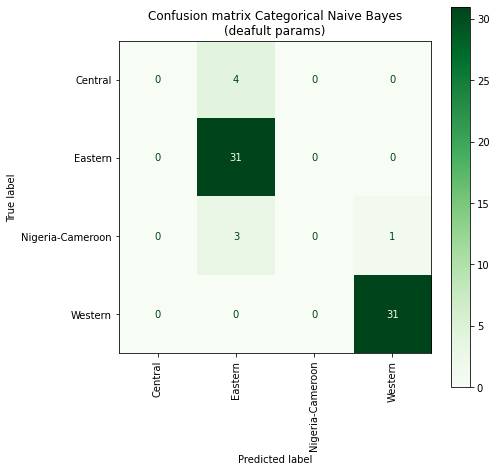

In [222]:
cm = confusion_matrix(y_test, cnb_y_pred, labels=cnb_clf.classes_)
cmp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cnb_clf.classes_)

fig,ax = plt.subplots(figsize=(7,7))

cmp.plot(xticks_rotation = 'vertical', colorbar=True, cmap = "Greens", ax=ax)
cmp.ax_.set_title("Confusion matrix Categorical Naive Bayes\n(deafult params)")

<span style="color:green">The categorical Naive Bayes classifier fails to predict any sample belonging to the Central or Nigeria-Cameroon subspecies.</span>

## <span style="color:green">3. Conclusion </span>
<span style="color:green">Once the data has been clean and filtered accordingly, it is possible to use a variety of classifiers in order to predict the chimpanzee's subspecies from genomic information. Out of the four classifiers tested, Random Forest, Nearest Neighbors and Support Vector Machine are the ones which perform best, since all of them yield an accuracy and f1-scores of 1. </span>